<a href="https://colab.research.google.com/github/IfrazQazi/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>



## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# <b>Business Objective:
* ### Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.
* ### We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.
* ### Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

* ### So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters.

* ### The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.

## <b> Importing Libraries and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install --upgrade xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/Credit Card Default Prediction/DCCC.xls' ,header=1)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
pd.set_option('display.max_columns',None)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [11]:
#lets check shape of dataset
df.shape

(30000, 25)

# <b>Dataset Information</b>

## This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## <b>Content</b>

###There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and * * * family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)





## and we can see that our dataset doesn't have any null values

<b> EDA

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
## check ID is having unique values or not
df['ID'].unique()

array([    1,     2,     3, ..., 29998, 29999, 30000])

In [14]:
## checking duplicate value 
df['ID'].duplicated().sum()

0

## so lets move to next features

In [15]:
# so lets chechk first categorical variable

cat = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','default payment next month']]

In [16]:
cat.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,20000,2,2,1,24,1
1,120000,2,2,2,26,1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,0


##. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. 

### so now we are going to change feature name for better understanding

In [17]:
df.rename(columns={'default payment next month':'defaulters'},inplace=True) #changing name of target variable

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulters'],
      dtype='object')

In [19]:
## change feature names of monthly payment record

df.rename(columns={'PAY_0':'pay_sep',
       'PAY_2':'pay_aug', 'PAY_3':'july', 'PAY_4':'pay_june', 'PAY_5':'pay_may', 'PAY_6':'pay_april'},inplace=True)

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.


In [20]:
## changing name of bill statement feature
df.rename(columns={ 'BILL_AMT1':'bill_sep', 'BILL_AMT2':'bill_aug',
       'BILL_AMT3':'bill_july', 'BILL_AMT4':'bill_june', 'BILL_AMT5':'bill_may', 'BILL_AMT6':'bill_april'},inplace=True)

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [21]:
## changing name of features amount paid in month
df.rename(columns={'PAY_AMT1':'paid_sep',
       'PAY_AMT2':'paid_aug', 'PAY_AMT3':'paid_july', 'PAY_AMT4':'paid_june', 'PAY_AMT5':'paid_may', 'PAY_AMT6':'paid_april'},inplace=True)

In [22]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_sep,pay_aug,july,pay_june,pay_may,pay_april,bill_sep,bill_aug,bill_july,bill_june,bill_may,bill_april,paid_sep,paid_aug,paid_july,paid_june,paid_may,paid_april,defaulters
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
# now lets check our dataset is having any null values or not
df.isna().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
pay_sep       0
pay_aug       0
july          0
pay_june      0
pay_may       0
pay_april     0
bill_sep      0
bill_aug      0
bill_july     0
bill_june     0
bill_may      0
bill_april    0
paid_sep      0
paid_aug      0
paid_july     0
paid_june     0
paid_may      0
paid_april    0
defaulters    0
dtype: int64

## it nice to see that our dataset doesn't have any null values and duplicate values

## so lets move to univariat analysis

## let first analyse users personal features

In [24]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_sep',
       'pay_aug', 'july', 'pay_june', 'pay_may', 'pay_april', 'bill_sep',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'paid_sep', 'paid_aug', 'paid_july', 'paid_june', 'paid_may',
       'paid_april', 'defaulters'],
      dtype='object')

In [25]:
## checking unique value
df['SEX'].unique() 

array([2, 1])

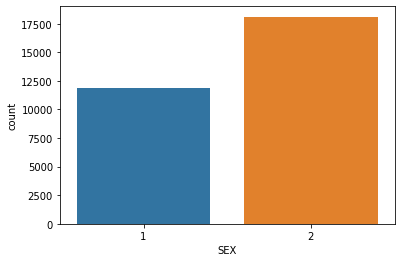

In [26]:
## count plot 
sns.countplot(df['SEX'])

## **SEX** Column have two unique values 1 is for male and 2 is for female
## We can also see that count of female credit card holder is higher than male.

In [27]:
## checking unique values 
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

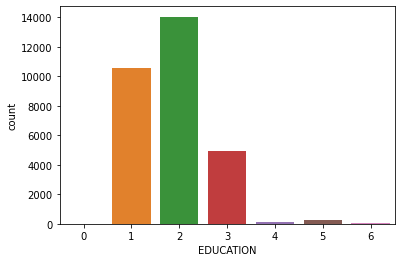

In [28]:
## count plot
sns.countplot(df['EDUCATION'])

In <b>EDUCATION</b> column we know that (1 = graduate school; 2 = university; 3 = high school; 4 = others) we can see most number of credit card holders are from university followed by graduate school.

But information about 0,5 and 6 are not given so can count it as invalid entries since amount is very low so lets  replace with others.

In [29]:
## replacing invalid values
df['EDUCATION'].replace({0:4,5:4,6:4},inplace=True)

In [30]:
## checking unique values 
df['EDUCATION'].unique()

array([2, 1, 3, 4])

## so now we successfully replace invalid entries with others.

In [31]:
## checking unique values 
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

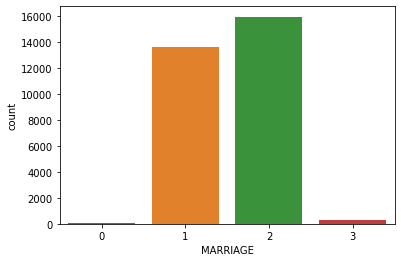

In [32]:
## count plot
sns.countplot(df['MARRIAGE'])

from above plot we can see that (1 = married; 2 = single; 3 = others) most number of credit card holders are single  but there is no information about 0. so we can just replace with others

In [33]:
## replacing invalid entries from Marriage feature
df['MARRIAGE'].replace({0:3},inplace=True)

In [34]:
## checking unique value for marriage feature
df['MARRIAGE'].unique()

array([1, 2, 3])

##so now we successfully replaced invalid values to others from MERRIAGE column.

In [35]:
cat=df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','defaulters']]

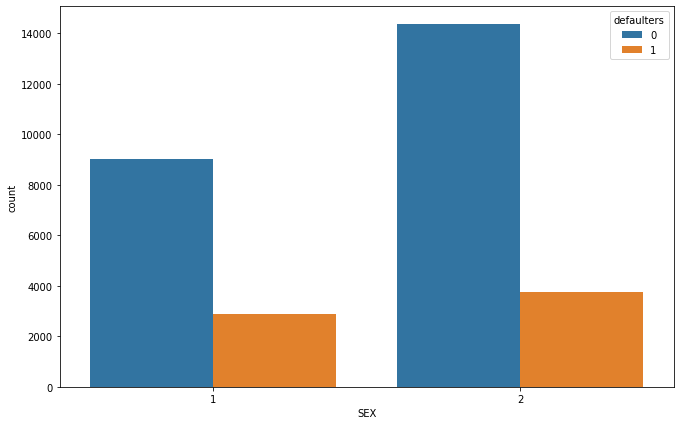

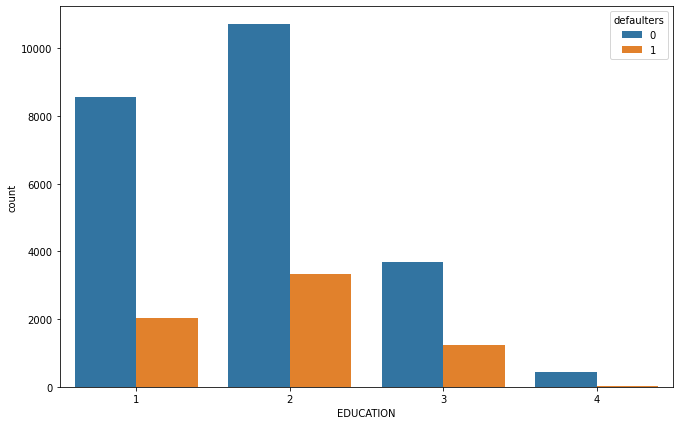

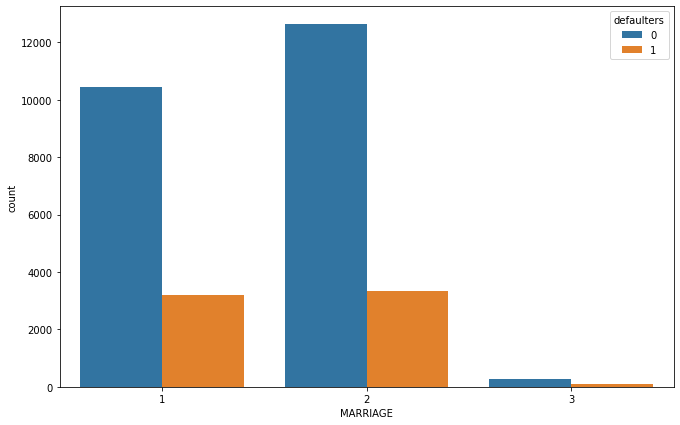

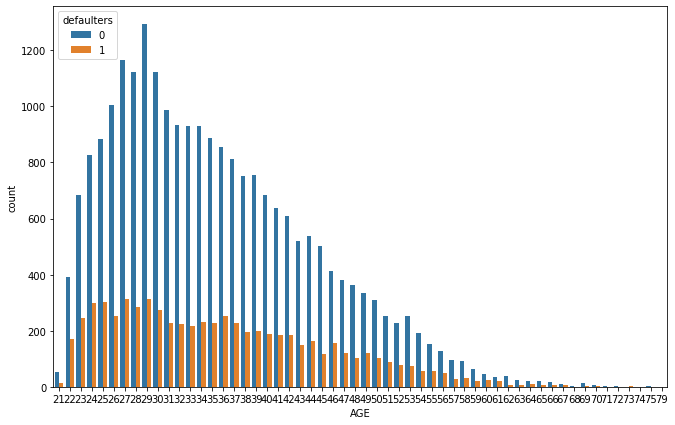

In [36]:
## plot for users personal information
cate =['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','defaulters']
for i in cate[:-1]:
  plt.subplots(1,1,figsize=(11,7,))
  sns.countplot(df[i],hue=df['defaulters'])
plt.show()

## now we can see all the feature are having valid information

## now lets analyze monthly payment features

In [37]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_sep',
       'pay_aug', 'july', 'pay_june', 'pay_may', 'pay_april', 'bill_sep',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'paid_sep', 'paid_aug', 'paid_july', 'paid_june', 'paid_may',
       'paid_april', 'defaulters'],
      dtype='object')

In [38]:
month_pay = ['pay_sep',
       'pay_aug', 'july', 'pay_june', 'pay_may', 'pay_april']

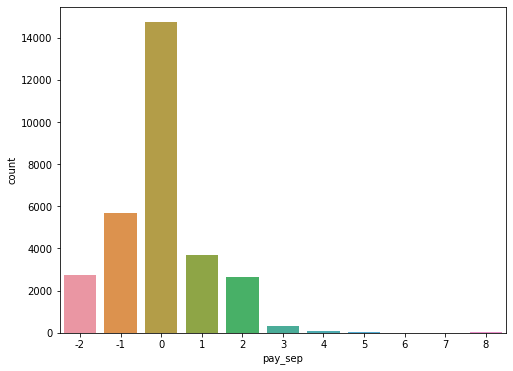

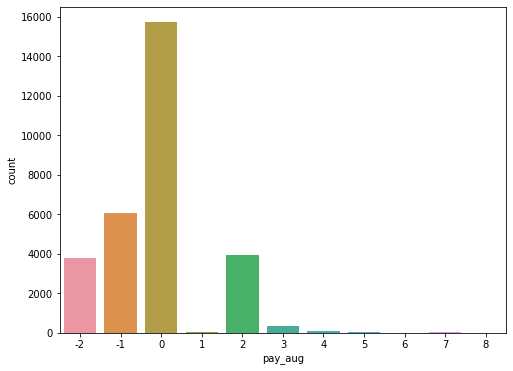

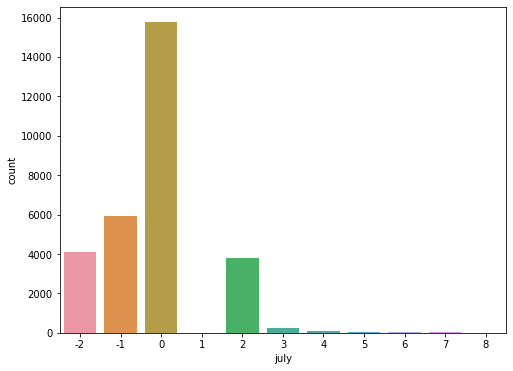

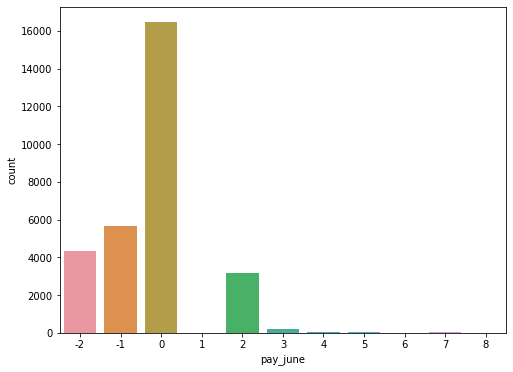

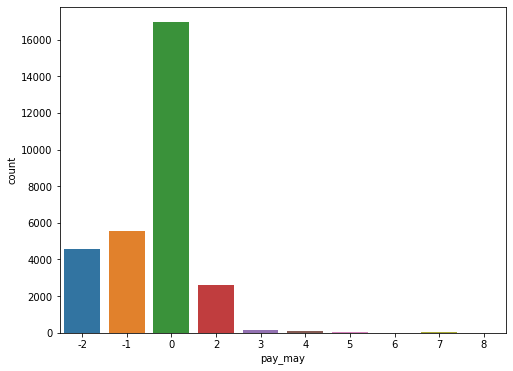

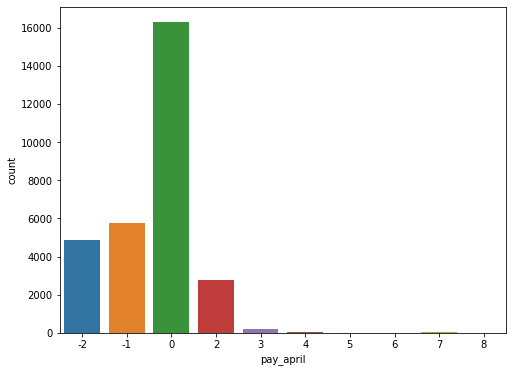

In [39]:
## count plot of monthly pay features
for i in month_pay:
  plt.subplots(1,1,figsize=(8,6))
  sns.countplot(df[i])
plt.show()

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
but we can see there is -2 also present in all the monthly features and its information is not given so we can replace it with -1 because it might be possible these users are paying on time.

In [40]:
## replacing invalid data
for i in month_pay:
  
  df[i].replace({-2:-1} , inplace=True)

In [41]:
df[month_pay].describe()

,pay_sep,pay_aug,july,pay_june,pay_may,pay_april
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.075267,-0.007700,-0.030033,-0.075733,-0.114667,-0.127933
std,0.990775,1.035798,1.025036,0.987436,0.941921,0.949384
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [42]:
for i in month_pay:
  print(f'unique values of {i} : {df[i].unique()}')

unique values of pay_sep : [ 2 -1  0  1  3  4  8  7  5  6]
unique values of pay_aug : [ 2  0 -1  3  5  7  4  1  6  8]
unique values of july : [-1  0  2  3  4  6  7  1  5  8]
unique values of pay_june : [-1  0  2  3  4  5  7  6  1  8]
unique values of pay_may : [-1  0  2  3  5  4  7  8  6]
unique values of pay_april : [-1  2  0  3  6  4  7  8  5]


## Now we successfully replace -2 to -1 (pay duly)

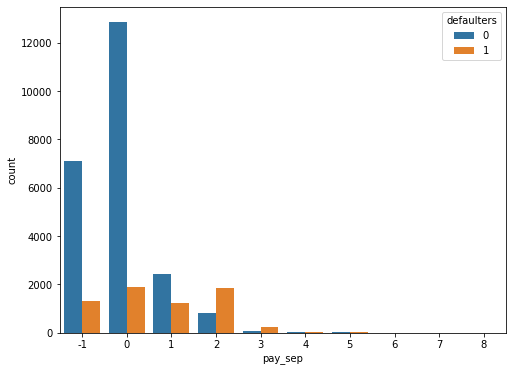

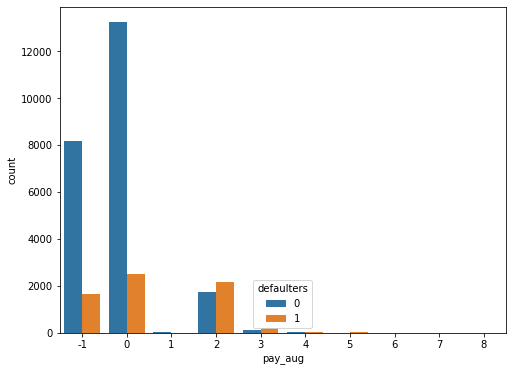

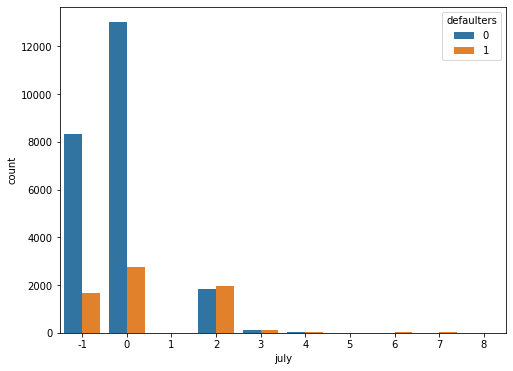

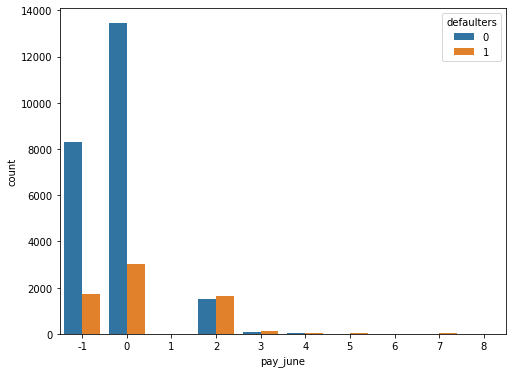

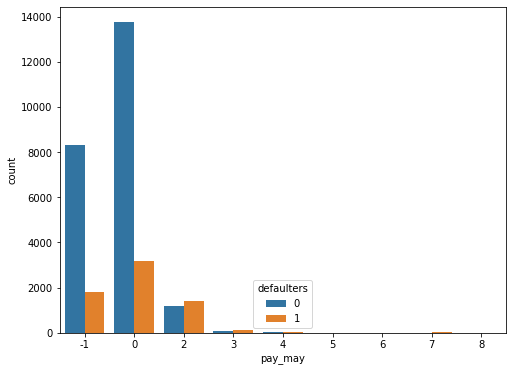

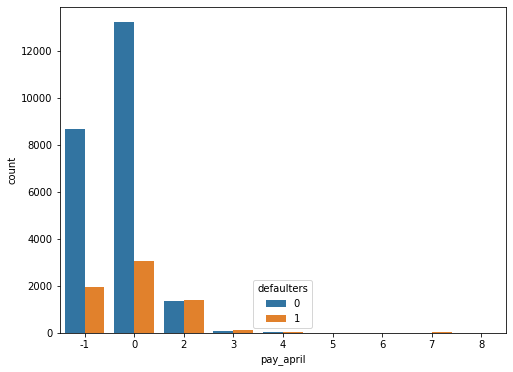

In [43]:
for i in month_pay:
  plt.subplots(1,1,figsize=(8,6))
  sns.countplot(df[i],hue=df['defaulters'])
plt.show()

In [44]:
month_pay

['pay_sep', 'pay_aug', 'july', 'pay_june', 'pay_may', 'pay_april']

In [45]:
df.loc[(df['pay_sep']==0) & (df['pay_aug']==0) & (df['july']==0) & (df['pay_june']==0) & (df['pay_may']==0) & (df['pay_april']==0) , 'defaulters'].value_counts()

0    8795
1    1026
Name: defaulters, dtype: int64

In [46]:
df.loc[(df['pay_sep']==-1) & (df['pay_aug']==-1) & (df['july']==-1) & (df['pay_june']==-1) & (df['pay_may']==-1) & (df['pay_april']==-1) , 'defaulters'].value_counts()

0    4457
1     738
Name: defaulters, dtype: int64

## we can see that some customers whom are paying on time or doesn't have any payment balance are also labeled as defaulters   

## now lets move to next columns

In [47]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_sep',
       'pay_aug', 'july', 'pay_june', 'pay_may', 'pay_april', 'bill_sep',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'paid_sep', 'paid_aug', 'paid_july', 'paid_june', 'paid_may',
       'paid_april', 'defaulters'],
      dtype='object')

In [48]:
month_bill = ['bill_sep',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']

In [49]:
month_bill

['bill_sep', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']

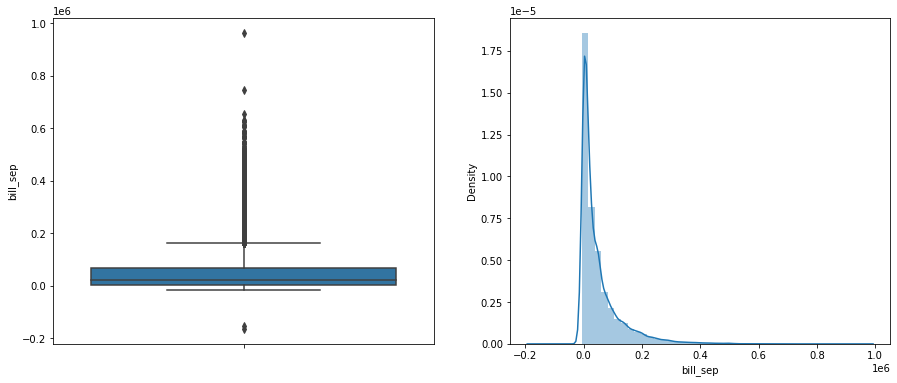

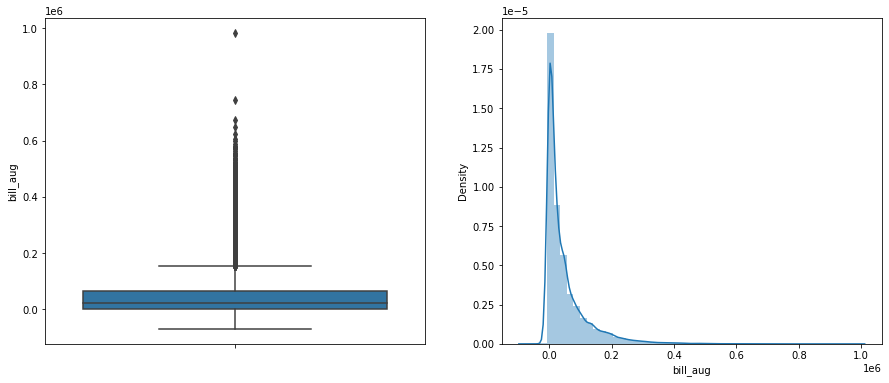

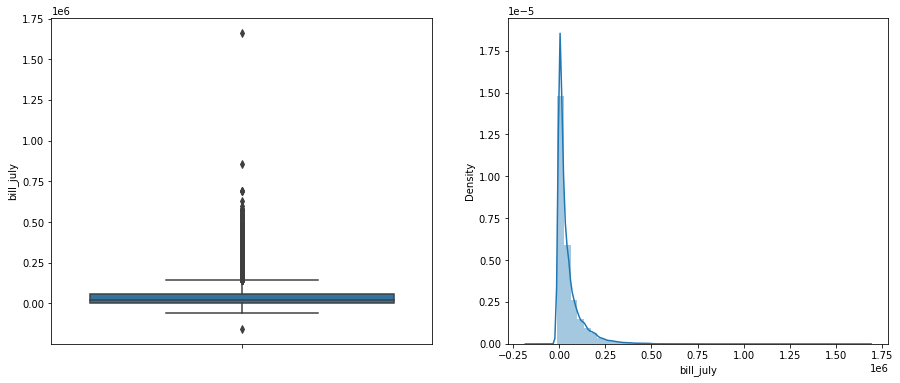

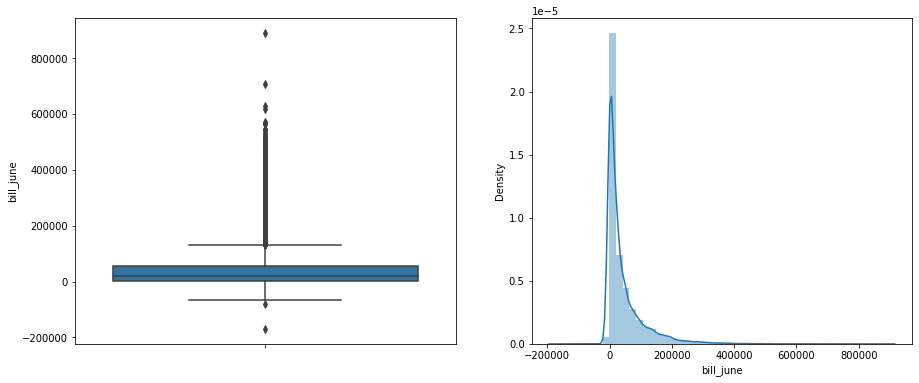

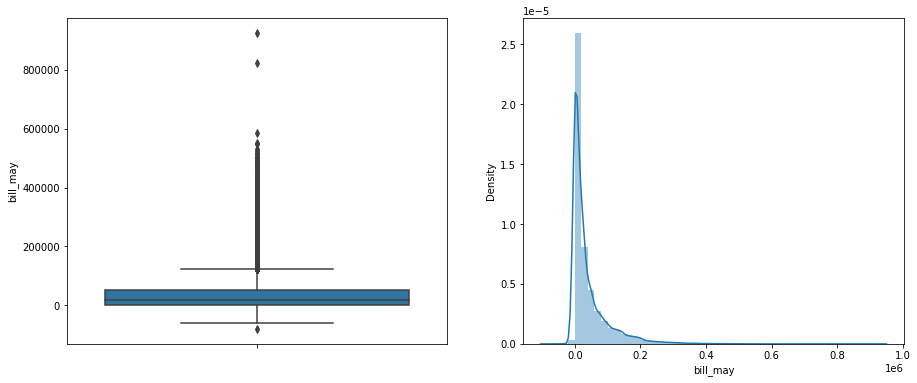

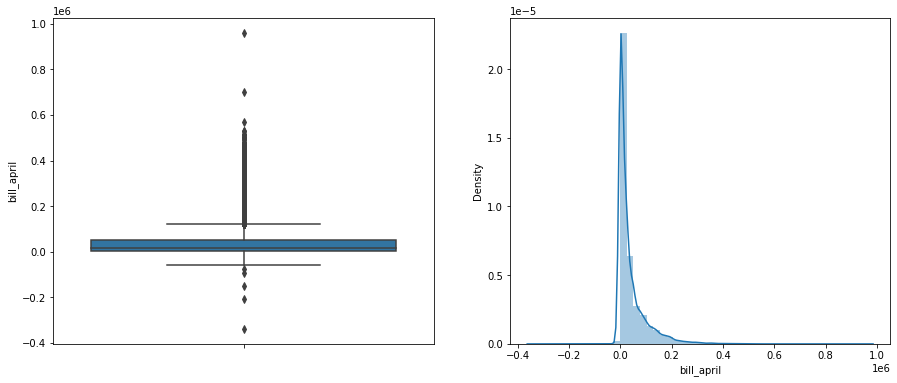

In [50]:
for i in month_bill:
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=df[i])
  fig.set_title('')
  fig.set_ylabel(i)
  
  plt.subplot(1, 2, 2)
  fig = sns.distplot(df[i].dropna())
  fig.set_xlabel(i)

  plt.show()

## we can see that all the monthly bill features are right skwed

In [51]:
df[month_bill].head()

,bill_sep,bill_aug,bill_july,bill_june,bill_may,bill_april
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


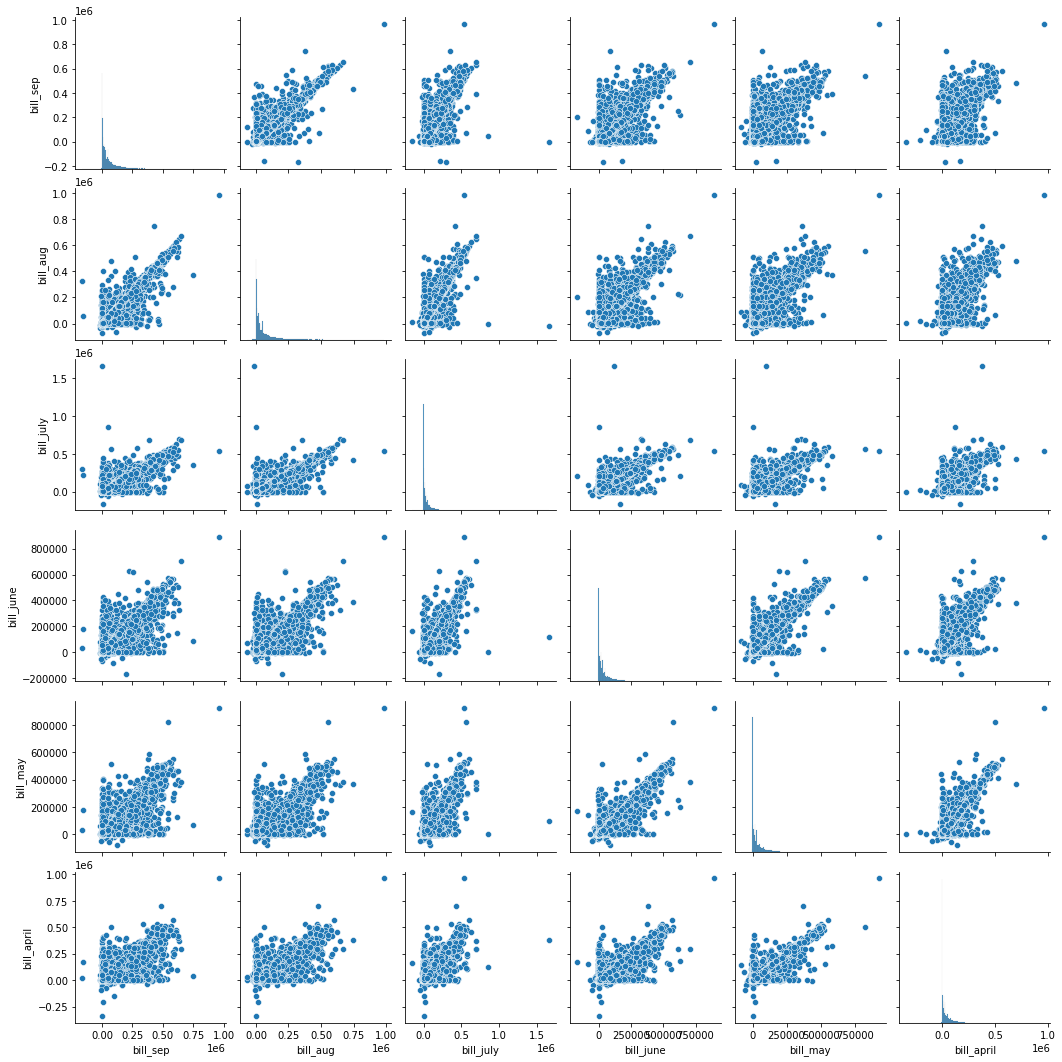

In [52]:
## checking relation of monthly bill features
sns.pairplot(df[month_bill] )


## We can see monthly bill  feautres are highly correlated to each other will see it later on.

## <b>now we are going to analyze Monthly Amount Paid features </b>

Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005

In [53]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_sep',
       'pay_aug', 'july', 'pay_june', 'pay_may', 'pay_april', 'bill_sep',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'paid_sep', 'paid_aug', 'paid_july', 'paid_june', 'paid_may',
       'paid_april', 'defaulters'],
      dtype='object')

In [54]:
month_paid = ['paid_sep', 'paid_aug', 'paid_july', 'paid_june', 'paid_may',
       'paid_april']

In [55]:
(df[df[month_paid]==0] ['defaulters'] ==0).value_counts()

False    30000
Name: defaulters, dtype: int64

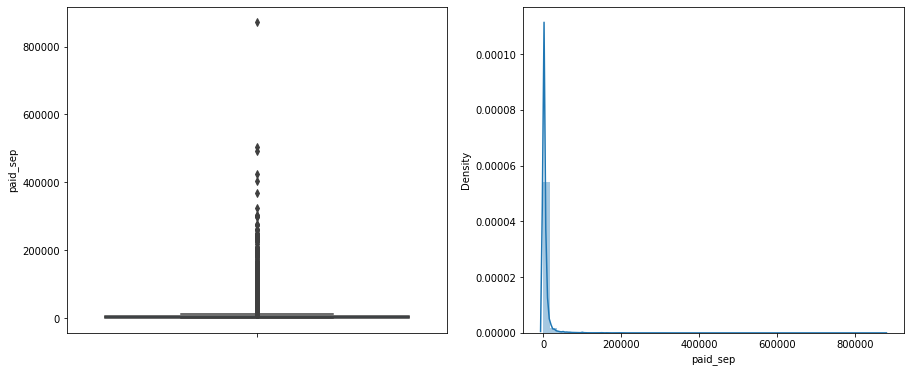

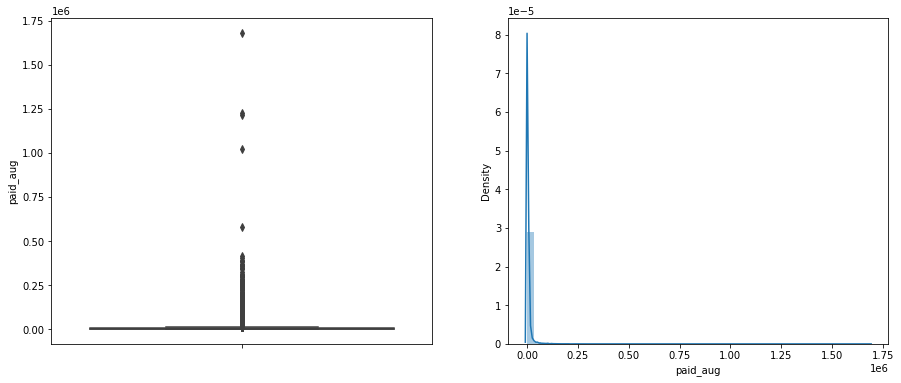

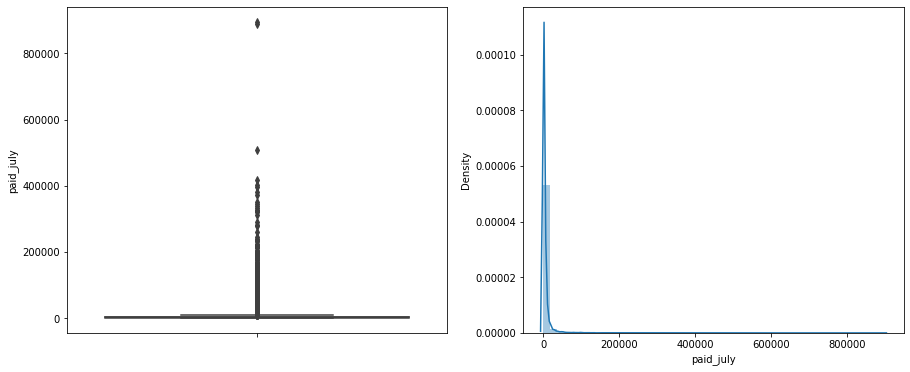

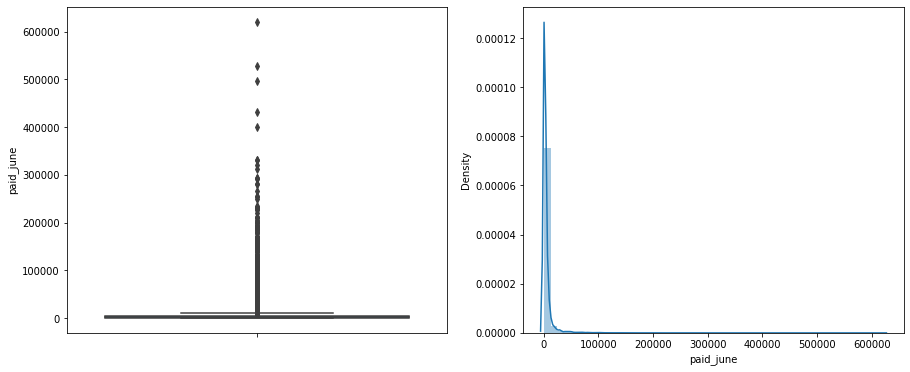

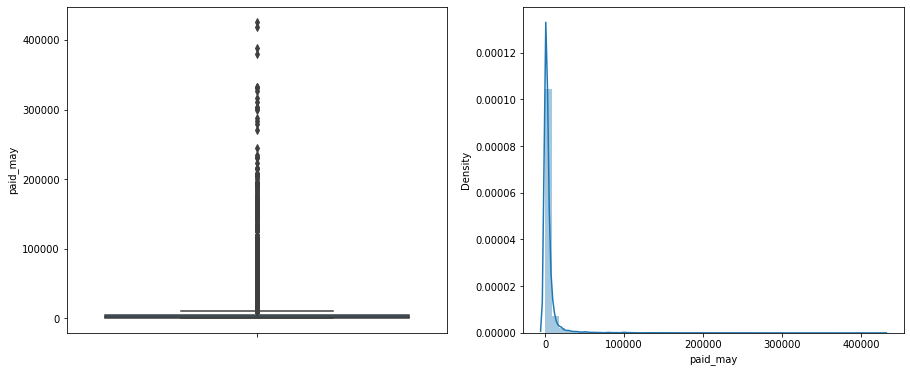

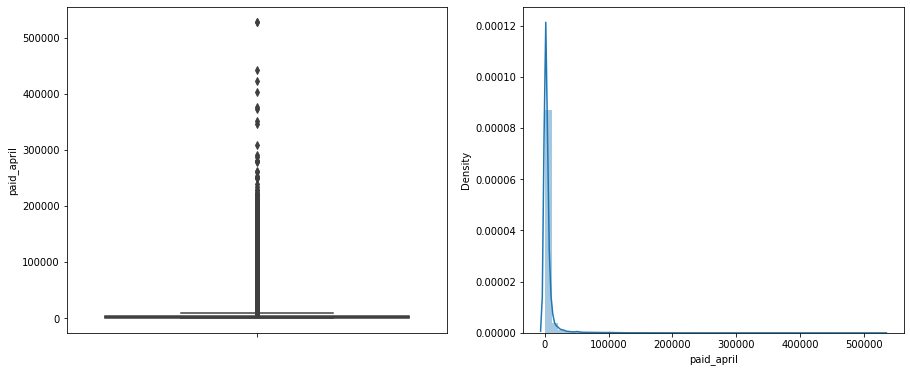

In [56]:
for i in month_paid:
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=df[i])
  fig.set_title('')
  fig.set_ylabel(i)
  
  plt.subplot(1, 2, 2)
  fig = sns.distplot(df[i].dropna())
  fig.set_xlabel(i)

  plt.show()

## similar to monthly bill feature monthly paid features are right skewed

## Lets Check LIMIT_BAL feature

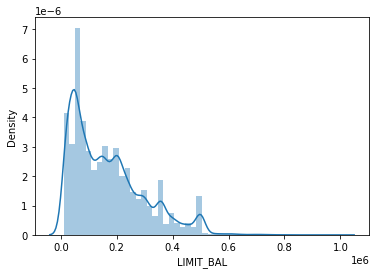

In [70]:
## checking distribution of LIMIT_BAL
sns.distplot(df['LIMIT_BAL'])

## Now we can say that all the numeric feautres in this dataset are Rightly Skwed

In [58]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_sep',
       'pay_aug', 'july', 'pay_june', 'pay_may', 'pay_april', 'bill_sep',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'paid_sep', 'paid_aug', 'paid_july', 'paid_june', 'paid_may',
       'paid_april', 'defaulters'],
      dtype='object')

## Feature Engineering

lets check multicolinearity of all numeric features

In [59]:
numer_df = ['LIMIT_BAL','bill_sep',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'paid_sep', 'paid_aug', 'paid_july', 'paid_june', 'paid_may',
       'paid_april']

In [60]:
corr = df[numer_df].corr()
corr

,LIMIT_BAL,bill_sep,bill_aug,bill_july,bill_june,bill_may,bill_april,paid_sep,paid_aug,paid_july,paid_june,paid_may,paid_april
LIMIT_BAL,1.000000,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
bill_sep,0.285430,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
bill_aug,0.278314,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
bill_july,0.283236,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
bill_june,0.293988,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
bill_may,0.295562,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
bill_april,0.290389,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
paid_sep,0.195236,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
paid_aug,0.178408,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
paid_july,0.210167,0.156887,0.150718,0.130011,0.300023,0.252305,0.233770,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740


For better understanding lets plot heatmap

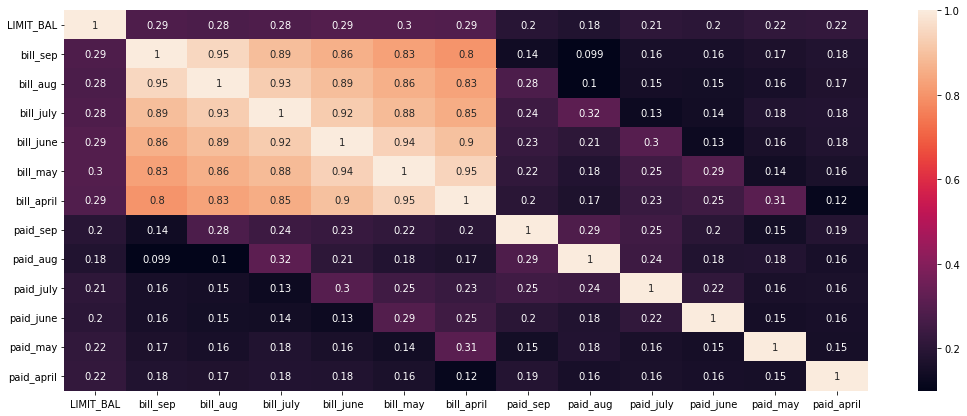

In [61]:
## ploting correlation plot to check relationship of all numeric feature
plt.figure(figsize=(18,7))
sns.heatmap(corr,annot=True,fmt='.2g')
plt.show()

As we can see from above heatmap that monthly bill features are very highly corelated to each other 

Lets plot heatmap separatly for monthly bill features and monthly paid features

In [62]:
month_bill = [ 'bill_sep',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']

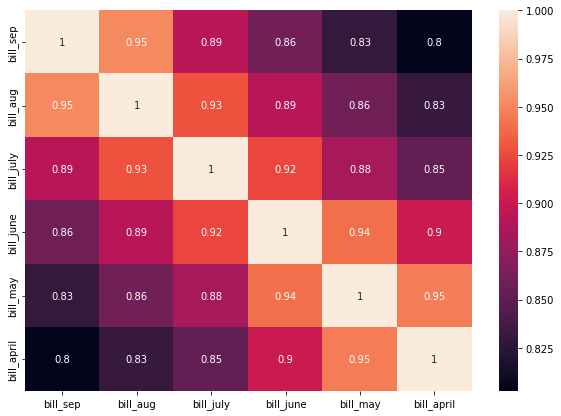

In [63]:
## correlation plot for monthly bill features
plt.figure(figsize=(10,7))

sns.heatmap(df[month_bill].corr(),annot=True,fmt='.2g')
plt.show()

## So one thing we can do here is we can make one new feature total bill amount by add all the monthly bill features.

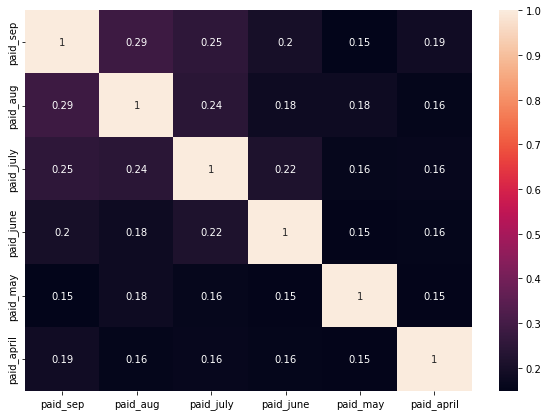

In [64]:
## correlation plot
plt.figure(figsize=(10,7))

sns.heatmap(df[month_paid].corr(),annot=True,fmt='.2g')
plt.show()

In [65]:

df['total_bill']=df['bill_sep'] + df['bill_aug'] + df['bill_july'] + df['bill_june'] + df['bill_may'] +df['bill_april']

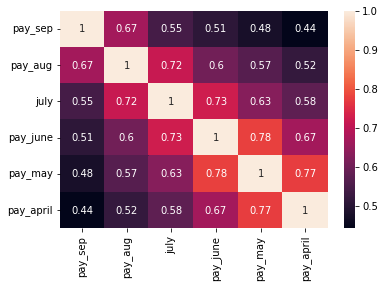

In [71]:
corr=df[month_pay].corr()
sns.heatmap(corr,annot=True,fmt='.2g')